<a href="https://colab.research.google.com/github/Alf-caput/LAB04_Regresion_y_agrupamiento/blob/Ldev/LAB04%20Regresion_y_agrupamientov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB04: Regresion y agrupamiento
# PRÁCTICA 2: REGRESIÓN MÚLTIPLE
##### Grupo: B05


Objetivo: construir un modelo de calidad que prediga el grado de alcohol de futuros vinos en base a diversos atributos del dataset.

Se carga el dataset:

In [1]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

In [2]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

### Análisis del dataset

In [13]:
import pandas as pd
df = pd.read_csv(filename, delimiter=';')
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


La columna 'id' es innecesaria.  Se elimina.

In [14]:
df = df.drop(columns = ['id'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


No hay valores NaN y cada variable contiene 6497 observaciones.

In [25]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,5.818378,1.753886,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,0.873255,0.430779,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000,1.000000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000,2.000000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000,2.000000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000,2.000000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,9.000000,2.000000,14.900000


Se verá ahora la distribución de la variable objetivo, que es el grado de alcohol.

<ipython-input-23-8a142d8e9c97>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['alcohol'], shade=True, color='blue')


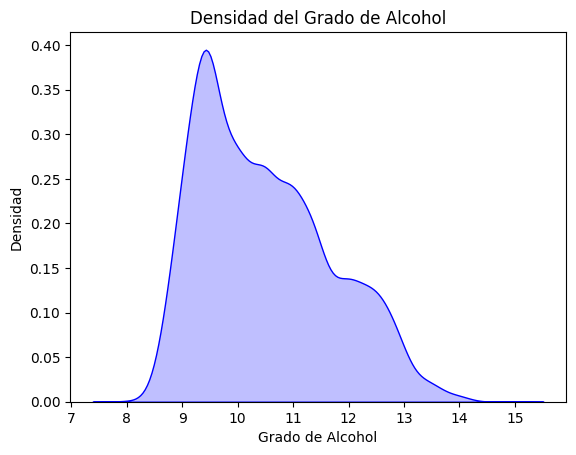

In [23]:
sns.kdeplot(df['alcohol'], shade=True, color='blue')
plt.title('Densidad del Grado de Alcohol')
plt.xlabel('Grado de Alcohol')
plt.ylabel('Densidad')
plt.show()

La variable objetivo es continua.  Toma valores desde 8 a 14.9 grados.  La mayor parte de los vinos están entre los 9 y 10 grados de alcohol.  Desde los 10 grados de alcohol, empiezan a haber menos vinos con más de 10 grados.

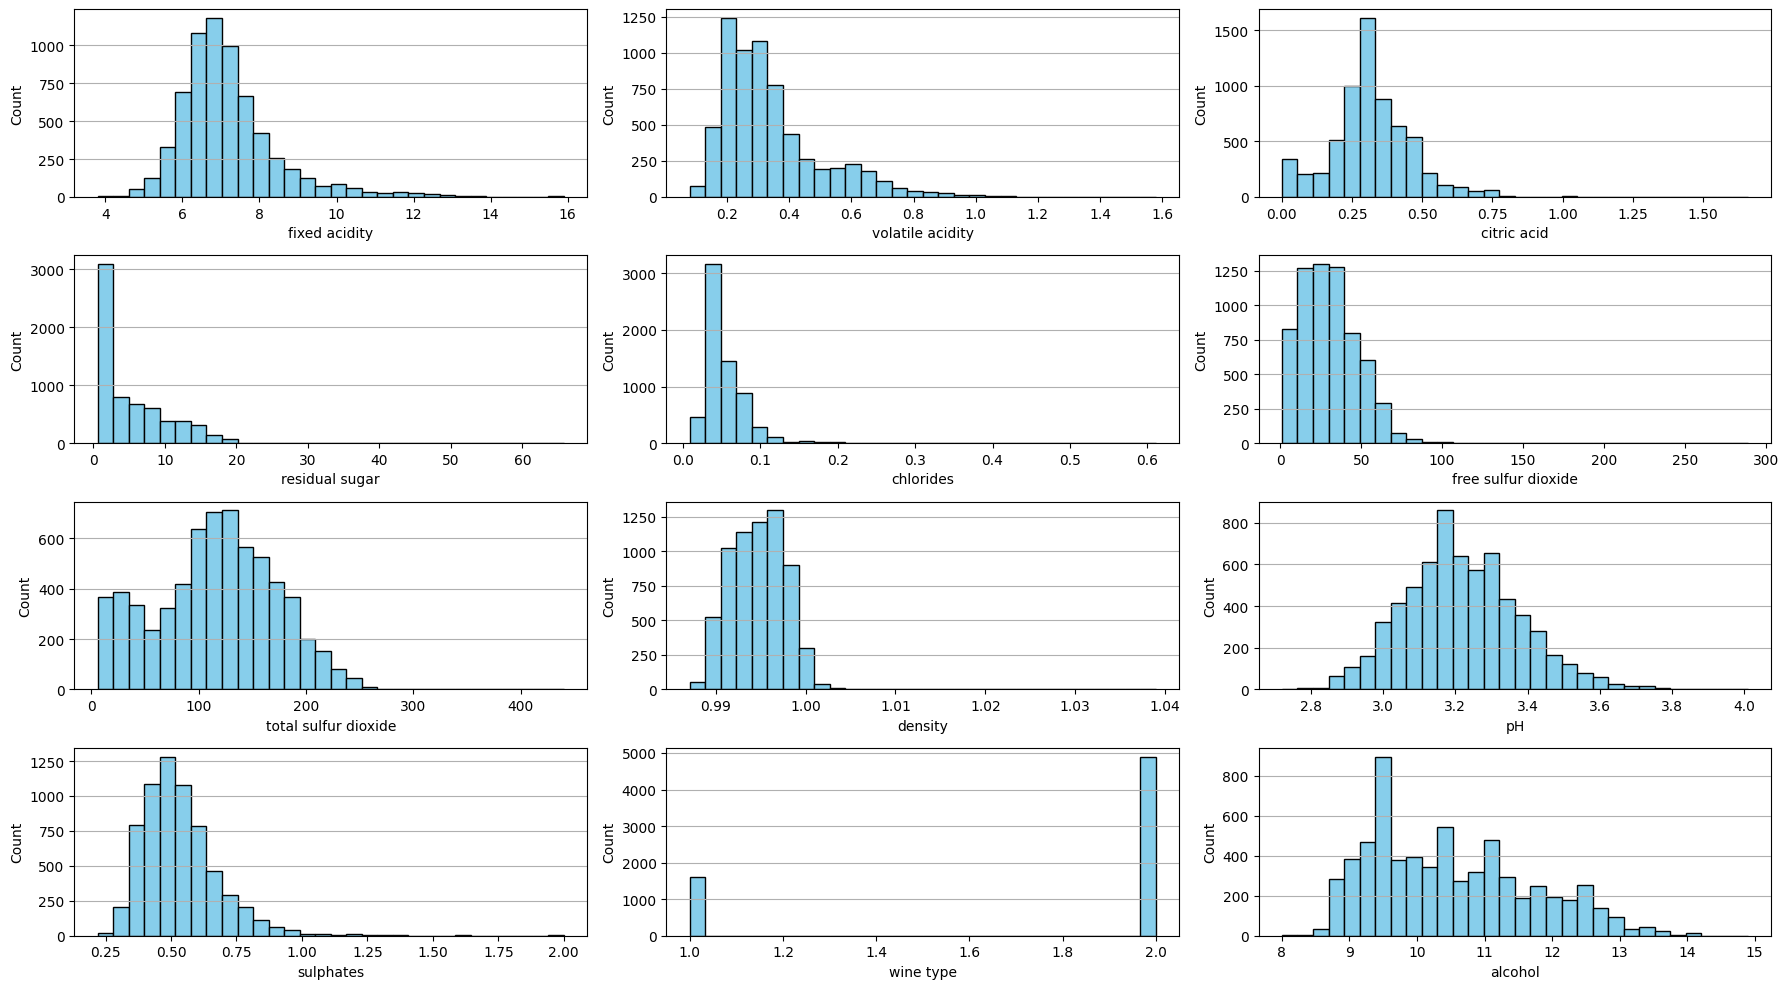

In [28]:

features = df.drop('quality', axis=1)

# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(18, 10))  # Increased figsize for better visibility

# Flatten the axes array for easier indexing
axs = axs.ravel()

# Visualize Distribution of Features
for i, column in enumerate(features.columns):
    axs[i].hist(features[column], bins=30, color='skyblue', edgecolor='black')

    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    axs[i].grid(axis='y')

# Remove any unused subplots
for j in range(i+1, 12):  # 12 is the total number of subplots (4x3)
    fig.delaxes(axs[j])

plt.subplots_adjust(hspace=0.5)  # Adjusted vertical space between plots
plt.tight_layout()
plt.show()

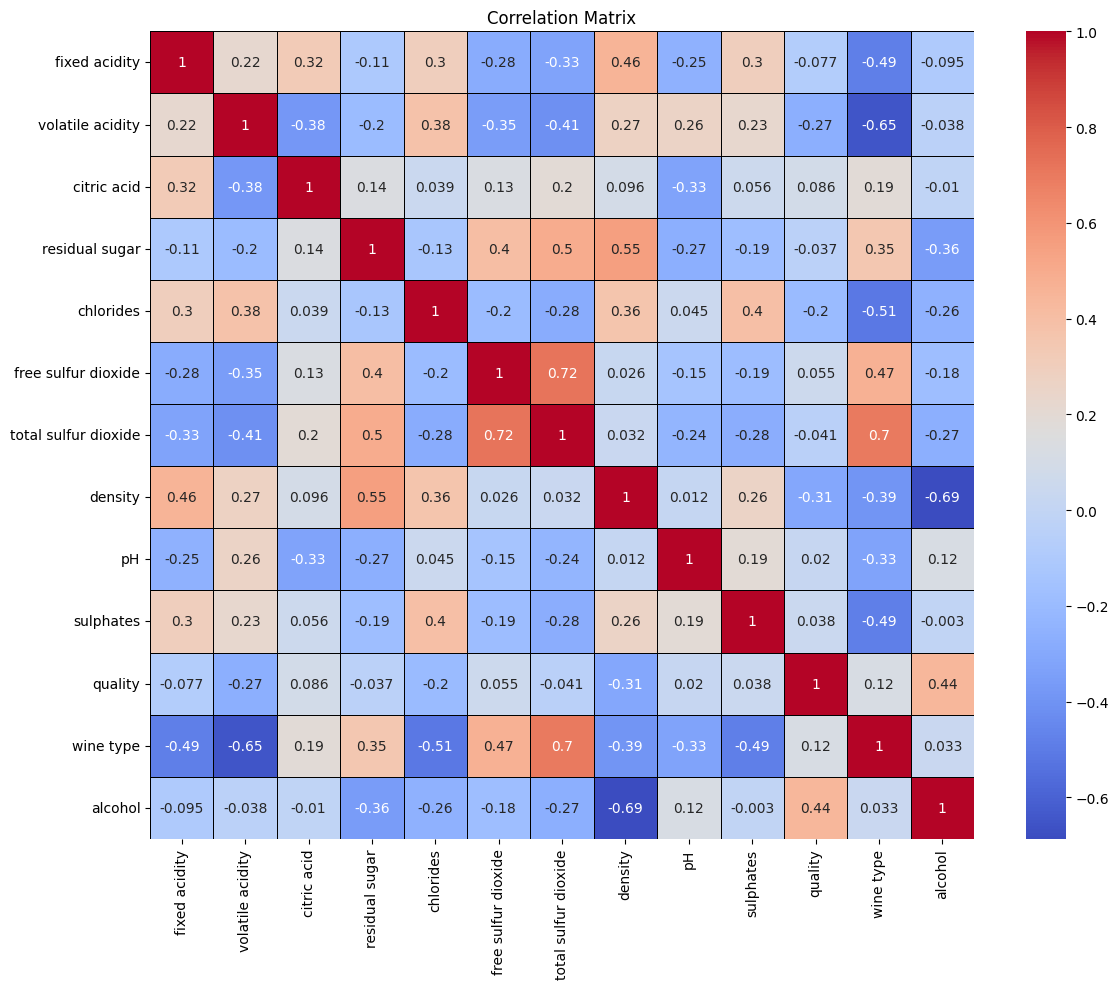

In [30]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [36]:
correlation_matrix = df.corr()

print('Las variables más dependientes entre sí son:\n')
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= abs(0.6):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} y {var2}")


Las variables más dependientes entre sí son:

free sulfur dioxide y total sulfur dioxide
total sulfur dioxide y wine type


No hay correlaciones demasiado fuertes.  Tomando las correlaciones mayores o iguales a 0.6 en valor absoluto, las variables más correlacionadas son: **free sulfur dioxide** + **total sulfur dioxide** y **total sulfur dioxide** + **wine type**.  Ambas correlaciones son positivas.

La variable **free sulfur dioxide** indica la parte del dióxido de azufre que está unido a las moléculas del vino.  Este previene el crecimiento microbiano y la oxidación del vino.

La característica **total sulfur dioxide** indica la cantidad total de dióxido de azufre.  Si es alta, podría hacer que el vino sepa a quemado.

El atributo **wine type** divide en dos tipos de vino, '1' y '2'.

1)DIVIDIR LOS DATOS DE ENTRENAMIENTO Y TEST

In [39]:
from sklearn.model_selection import train_test_split

# Supongamos que 'X' son todas las columnas excepto la que deseas predecir, y 'y' es la columna que deseas predecir.
X = df.drop('alcohol', axis=1)  # 'alcohol' debe ser el nombre de la columna objetivo.
y = df['alcohol']

# División del dataset en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Tamaño del conjunto de entrenamiento: (4872, 12)
Tamaño del conjunto de prueba: (1625, 12)


2) CONSTRUIR UN MODELO DE REGRESIÓN MÚLTIPLE

In [43]:
# Ajusta estas características según tu análisis
features = ['chlorides', 'citric acid']
X_train_selected = X_train[features]
X_test_selected = X_test[features]


In [44]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train_selected, y_train)


LinearRegression()

In [45]:
# Predecir los valores de alcohol en el conjunto de prueba
y_pred = model.predict(X_test_selected)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1.311918790462869
R2 Score: 0.06761374509739726


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.utils import all_estimators
import warnings

# Convert warnings to errors
warnings.simplefilter('error')  # This line will treat warnings as errors

# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean. Adjust this as needed.

# Split the data into features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Get all regression estimators
estimators = all_estimators(type_filter='regressor')

results = {}  # Dictionary to store results

for name, RegressorClass in estimators:
    try:
        # Create a regressor instance
        model = RegressorClass()

        # Perform 10-fold cross-validation and compute the average RMSE
        negative_mses = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
        avg_rmse = np.sqrt(-negative_mses.mean())

        results[name] = avg_rmse
        print(f"{name} Average RMSE: {avg_rmse}")

    except Exception as e:
        print(f"Issue with {name}")  # This will catch both errors and warnings

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(list(results.items()), columns=['Regressor', 'Avg RMSE']).sort_values(by='Avg RMSE')

# Print the top 10 performers without the index
print(results_df.head(10).to_string(index=False))